In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
df_small = pd.read_csv('data/pokemon_small.csv')

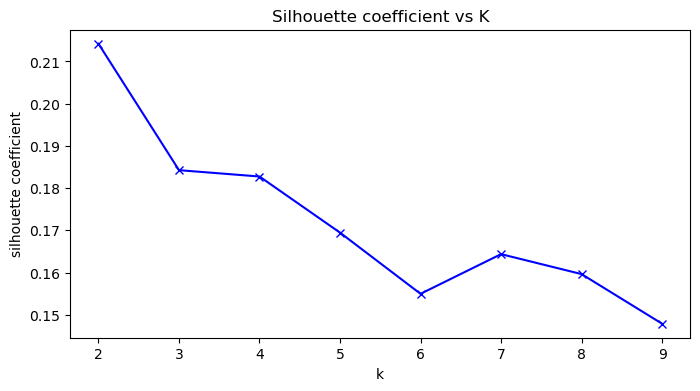

In [4]:
#silhouette method
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 'auto')
    kmeanModel.fit(df_small)
    label=kmeanModel.predict(df_small)
    silhouettes.append(silhouette_score(df_small,label))
    
# plot silhouette
plt.figure(figsize=(8,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

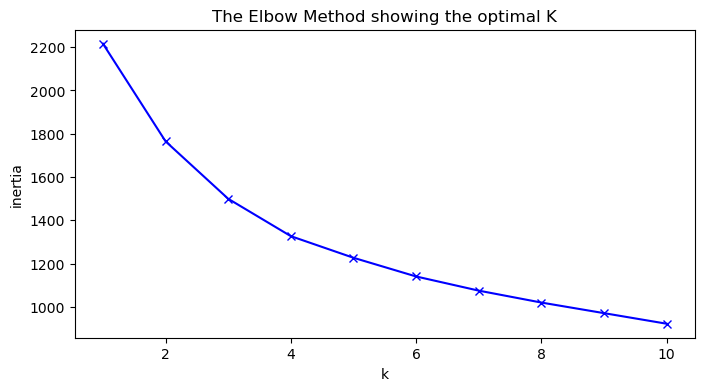

In [6]:
#elbow method with scaled data
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_small)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(8,4))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [23]:
#Create Model
model = KMeans(3)

# Train model
model.fit(df_small)

# Make predictions
y_pred = model.predict(df_small)

In [24]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_small)

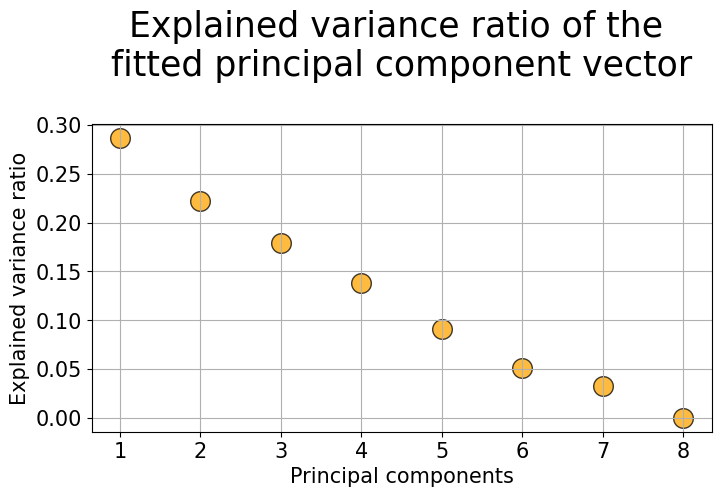

In [25]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [26]:
pca.explained_variance_ratio_

array([2.86881093e-01, 2.21589216e-01, 1.78700498e-01, 1.38514723e-01,
       9.08226695e-02, 5.10137852e-02, 3.24780153e-02, 8.51772686e-33])

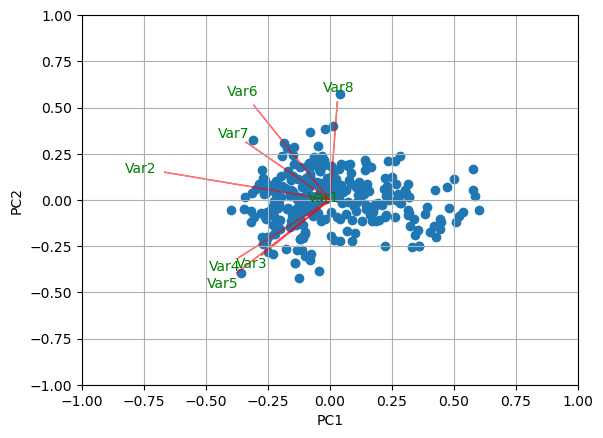

In [27]:
dfx_pca = pca.fit_transform(df_small)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(dfx_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

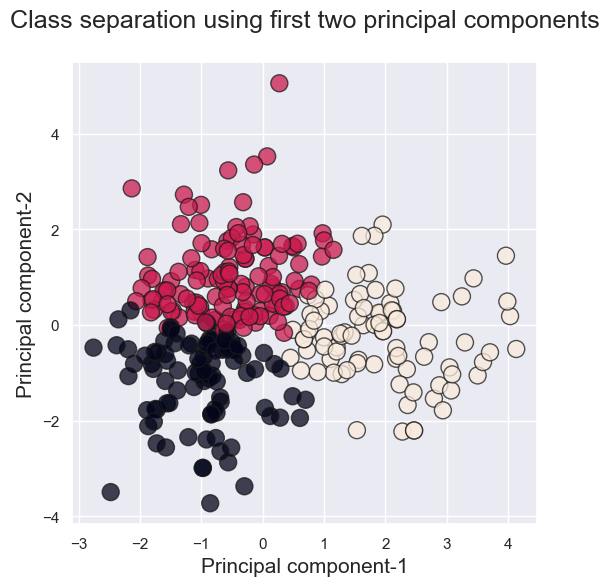

In [93]:
dfx_trans = pca.transform(df_small)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(6,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=y_pred,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=18)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

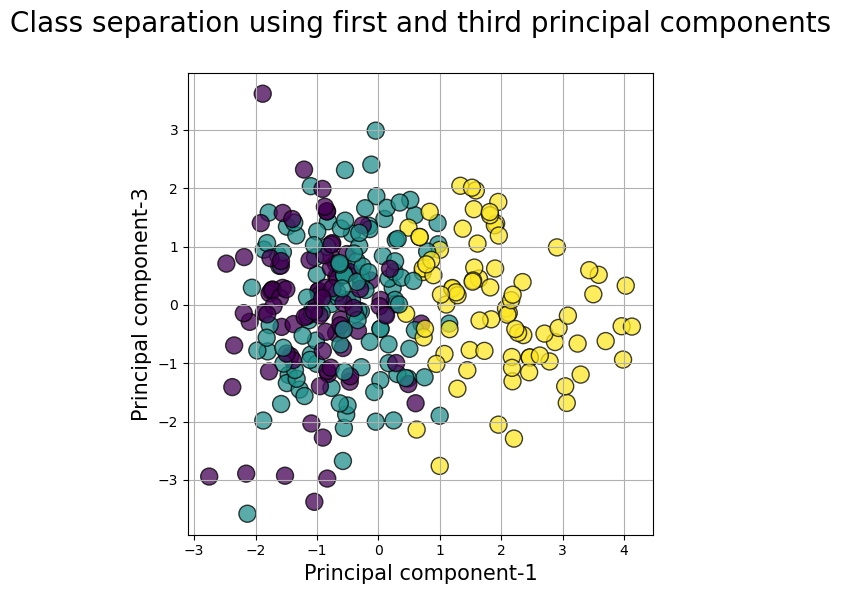

In [29]:
dfx_trans = pca.transform(df_small)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(6,6))
plt.scatter(dfx_trans[0],dfx_trans[2],c=y_pred,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first and third principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-3",fontsize=15)
plt.show()

In [30]:
original_file = pd.read_csv('data/pokedex_(Update_05.20).csv')[['name','type_1','type_2','status','total_points','hp','attack','defense','sp_attack','sp_defense','speed']]

#drop all legendary, mythical etc.
original_file = original_file[original_file['status']=='Normal']
original_file = original_file.drop(['status'],axis=1)
original_file_small = original_file[original_file['total_points']<=350]

In [31]:
original_file_small

,name,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0
4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0
9,Squirtle,Water,NaN,314.0,44.0,48.0,65.0,50.0,64.0,43.0
13,Caterpie,Bug,NaN,195.0,45.0,30.0,35.0,20.0,20.0,45.0
14,Metapod,Bug,NaN,205.0,50.0,20.0,55.0,25.0,25.0,30.0
...,...,...,...,...,...,...,...,...,...,...
990,Impidimp,Dark,Fairy,265.0,45.0,45.0,30.0,55.0,40.0,50.0
999,Milcery,Fairy,NaN,270.0,45.0,40.0,40.0,50.0,61.0,34.0
1003,Snom,Ice,Bug,185.0,30.0,25.0,35.0,45.0,30.0,20.0
1012,Cufant,Steel,NaN,330.0,72.0,80.0,49.0,40.0,49.0,40.0


In [32]:
#add clusters to data
y_pred_df = pd.DataFrame(y_pred)
cluster_df = pd.concat([original_file_small,y_pred_df.set_index(original_file_small.index)],axis=1)
cluster_df = cluster_df.rename({0:'cluster'},axis=1)

In [33]:
mean_df = cluster_df.iloc[:,3:24].groupby(by='cluster').mean()
mean_df

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
cluster,,,,,,,
0,311.258065,55.000000,64.784946,67.548387,39.494624,48.053763,36.376344
1,311.007752,47.651163,50.279070,44.728682,57.488372,53.023256,57.837209
2,237.678571,41.285714,41.285714,38.047619,33.154762,37.273810,46.630952


In [34]:
import plotly.graph_objs as go

In [35]:
max_df = mean_df
max_df['total_points'] = mean_df['total_points']/mean_df['total_points'].max()
max_df['hp'] = mean_df['hp']/mean_df['hp'].max()
max_df['attack'] = mean_df['attack']/mean_df['attack'].max()
max_df['defense'] = mean_df['defense']/mean_df['defense'].max()
max_df['sp_attack'] = mean_df['sp_attack']/mean_df['sp_attack'].max()
max_df['sp_defense'] = mean_df['sp_defense']/mean_df['sp_defense'].max()
max_df['speed'] = mean_df['speed']/mean_df['speed'].max()

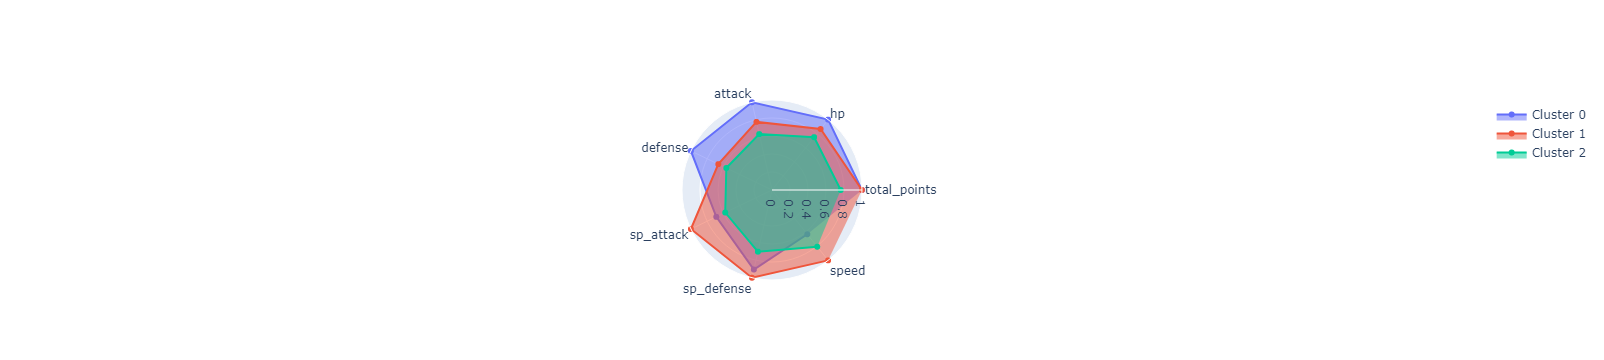

In [36]:
#Radar plot: Attempt to plot as % of max of column

#Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = mean_df.columns
cluster_list = [0,1,2]
# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster 
for i in cluster_list:
    # Select column values in df_scaled
    radius = max_df.loc[i].values
    # Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
polar=dict (radialaxis = dict(visible = True,range=[0,1])),
showlegend=True
        )

chart.show()

In [64]:
#create boolean column for each type (True if has type at all)
cluster_df['Normal'] = (cluster_df['type_1']=='Normal') | (cluster_df['type_2']=='Normal')
cluster_df['Bug'] = (cluster_df['type_1']=='Bug') | (cluster_df['type_2']=='Bug')
cluster_df['Water'] = (cluster_df['type_1']=='Water') | (cluster_df['type_2']=='Water')
cluster_df['Fire'] = (cluster_df['type_1']=='Fire') | (cluster_df['type_2']=='Fire')
cluster_df['Grass'] = (cluster_df['type_1']=='Grass') | (cluster_df['type_2']=='Grass')
cluster_df['Ghost'] = (cluster_df['type_1']=='Ghost') | (cluster_df['type_2']=='Ghost')
cluster_df['Psychic'] = (cluster_df['type_1']=='Psychic') | (cluster_df['type_2']=='Psychic')
cluster_df['Dark'] = (cluster_df['type_1']=='Dark') | (cluster_df['type_2']=='Dark')
cluster_df['Fighting'] = (cluster_df['type_1']=='Fighting') | (cluster_df['type_2']=='Fighting')
cluster_df['Ground'] = (cluster_df['type_1']=='Ground') | (cluster_df['type_2']=='Ground')
cluster_df['Rock'] = (cluster_df['type_1']=='Rock') | (cluster_df['type_2']=='Rock')
cluster_df['Flying'] = (cluster_df['type_1']=='Flying') | (cluster_df['type_2']=='Flying')
cluster_df['Electric'] = (cluster_df['type_1']=='Electric') | (cluster_df['type_2']=='Electric')
cluster_df['Ice'] = (cluster_df['type_1']=='Ice') | (cluster_df['type_2']=='Ice')
cluster_df['Dragon'] = (cluster_df['type_1']=='Dragon') | (cluster_df['type_2']=='Dragon')
cluster_df['Fairy'] = (cluster_df['type_1']=='Fairy') | (cluster_df['type_2']=='Fairy')
cluster_df['Poison'] = (cluster_df['type_1']=='Poison') | (cluster_df['type_2']=='Poison')
cluster_df['Steel'] = (cluster_df['type_1']=='Steel') | (cluster_df['type_2']=='Steel')

#change to 0/1
cluster_df.iloc[:,11:29] = cluster_df.iloc[:,11:29].astype('int')

In [67]:
type_df = cluster_df.iloc[:,10:29].groupby('cluster').mean()

In [90]:
round(type_df*100,2)

,Normal,Bug,Water,Fire,Grass,Ghost,Psychic,Dark,Fighting,Ground,Rock,Flying,Electric,Ice,Dragon,Fairy,Poison,Steel
cluster,,,,,,,,,,,,,,,,,,
0,6.45,9.68,13.98,2.15,15.05,10.75,7.53,5.38,7.53,16.13,11.83,2.15,2.15,4.30,6.45,3.23,9.68,11.83
1,9.30,6.20,22.48,11.63,16.28,5.43,13.18,6.20,3.10,3.88,0.00,9.30,6.98,5.43,2.33,6.20,8.53,0.78
2,29.76,21.43,10.71,1.19,9.52,2.38,1.19,5.95,3.57,4.76,3.57,16.67,4.76,2.38,2.38,9.52,9.52,1.19


In [84]:
import seaborn as sns

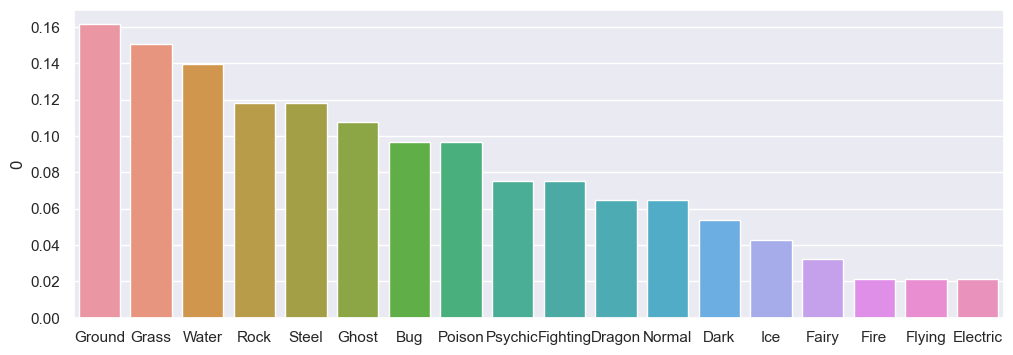

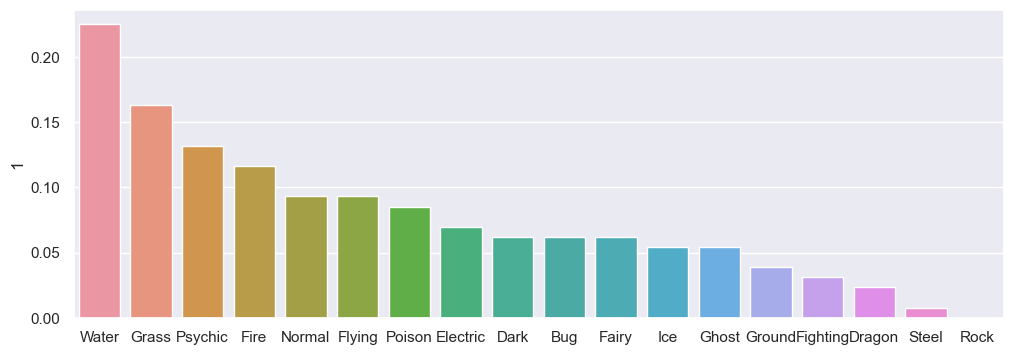

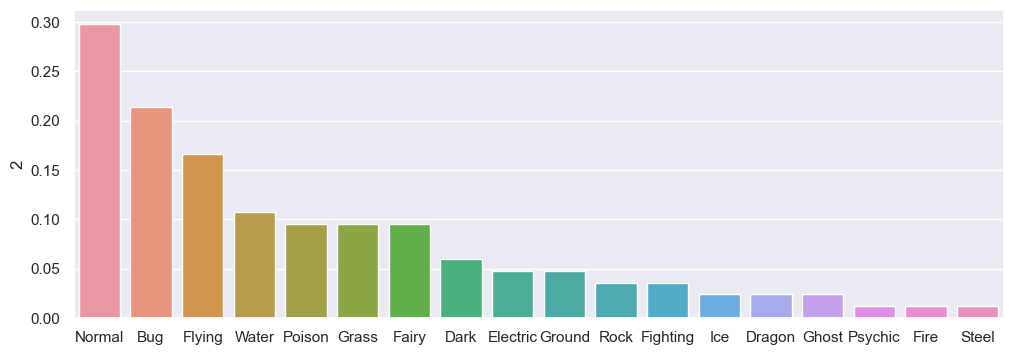

In [91]:
for i in range(len(type_df)):
    sns.set(rc={'figure.figsize':(12,4)})
    sns.barplot(x=type_df.iloc[i].sort_values(ascending=False).index, y = type_df.iloc[i].sort_values(ascending=False))
    plt.show()